Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.show()

In [3]:
chess=pd.read_csv('games.csv')
chess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


**1 Узнаем кто больше побеждает - белые или черные?**

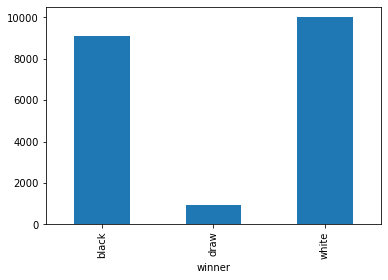

In [44]:
plotWinner = chess.groupby('winner').size().plot(kind='bar')
plt.show()

Белые побеждают больше

**2. Узнаем кто больше всего играл белыми**

In [57]:
topwhite = chess.groupby('white_id')[['id']].count()\
    .sort_values('id', ascending=False).head()
    
topwhite

,id
white_id,
taranga,72
chess-brahs,53
a_p_t_e_m_u_u,49
ssf7,48
bleda,48


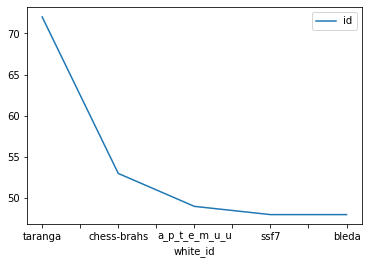

In [58]:
topwhite.plot()

с игроком taranga лучше всего не играть черными)

**3. Узнаем кто больше всего играл черными**

In [59]:
topblack = chess.groupby('black_id')[['id']].count()\
    .sort_values('id', ascending=False).head()
    
topblack

,id
black_id,
taranga,82
vladimir-kramnik-1,60
a_p_t_e_m_u_u,47
king5891,44
docboss,44


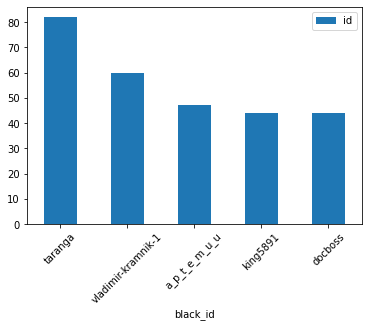

In [60]:
topblack.plot(kind='bar', rot=45)

О нет! И здесь эта taranga! видимо она очень любит играть в шахматы! 

**4. Узнаем 10 самых высоких рейтингов у белых**

In [88]:
top_white = chess.groupby('white_id')[['white_rating']].max()\
    .sort_values('white_rating', ascending=False).head(10)
top_white.style.bar()

,white_rating
white_id,
justicebot,2700
blitzbullet,2622
lance5500,2621
shahoviy_komentator,2586
teatime007,2579
le_truand,2549
king-bullet,2522
lexisvar,2513
chess-stat,2500


**5. Узнаем 10 самых высоких рейтингов у черных**

In [89]:
top_black = chess.groupby('black_id')[['black_rating']].max()\
    .sort_values('black_rating', ascending=False).head(10)
top_black.style.bar()

,black_rating
black_id,
justicebot,2723
lance5500,2621
avill050,2588
teatime007,2577
tree33,2540
marantz3,2526
sparklehorse,2516
chess-stat,2500
vahapsanal,2499


**6. Статистика статуса побед**

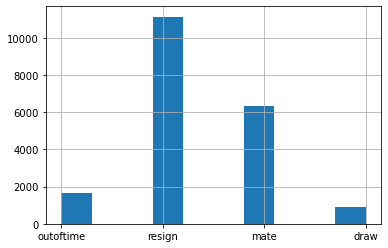

In [93]:
chess.victory_status.hist()

Большинство игроков сдавались, на втором месте - игра дошла до мата, на третьем месте - вышло время у одного из игроков, 4 - ничья.

**7. Статистика первых ходов**

In [122]:
chess['moves'] = chess['moves'].str[:3]

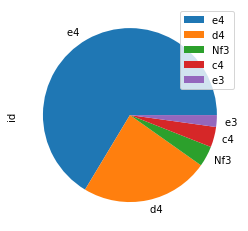

In [148]:
name_dynamics = chess.groupby(['moves']).count().sort_values(by='id', ascending=False).head(5)
# name_dynamics
name_dynamics.plot(kind='pie', y='id' )

Исходя из диаграммы видно, что наиболее популярный первый ход белых - е4.